### K-Means



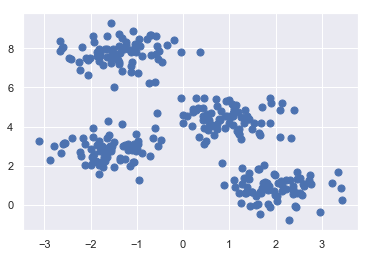

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);


In [2]:
X.shape

(300, 2)

array([1, 0, 2, 0, 1, 1, 3, 2, 0, 0])

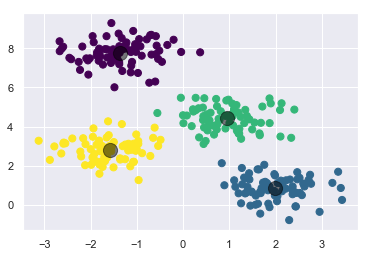

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
y_kmeans[:10]

In [4]:
kmeans.cluster_centers_,kmeans.labels_[:10], kmeans.n_iter_

(array([[-1.37324398,  7.75368871],
        [ 1.98258281,  0.86771314],
        [ 0.94973532,  4.41906906],
        [-1.58438467,  2.83081263]]), array([1, 0, 2, 0, 1, 1, 3, 2, 0, 0]), 4)

In [5]:
kmeans.inertia_

212.00599621083478

A very simple illustration of K-Means working is given below. First 2 random centers are chosen. Then for each point in dataset, distances of data point from both centers are calculated and these 2 distances are compared. Data points closer to a given center are collected in a list. This way, our entire dataset is divided into 2 sets. These ar our clusters. For cluster centers, we simply take the mean of each list.    

In [6]:
a = np.array([1,1,2,3,2,1,6,7,8,9,8,7])
a1, b1 = 2,8
list1 = []
list2 = []
s = 0
for i in a:
    if np.abs(i-a1) < np.abs(i-b1):
        list1.append(i)
    else:
        list2.append(i)
        
c1 = np.mean(list1)
c2 = np.mean(list2)
print(c1, c2)
print(list1, list2)

1.6666666666666667 7.5
[1, 1, 2, 3, 2, 1] [6, 7, 8, 9, 8, 7]


#### `kmeans.inertia_` attribute

In [7]:
inertia = 0
for i in a:
    if i < 6:
        sqr = (c1 - i)**2
        inertia=inertia + sqr
    else:
        sqr = (c2 - i)**2
        inertia = inertia+ sqr
        
inertia        

8.833333333333334

Now compare above results with that of KMeans classifiers.

In [8]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters =  2)

a_new = a[:, np.newaxis]
clf.fit(a_new)
y = clf.predict(a_new)
y, clf.inertia_, clf.labels_, clf.cluster_centers_

(array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]),
 8.833333333333334,
 array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]),
 array([[1.66666667],
        [7.5       ]]))

As can be seen, both results are same.

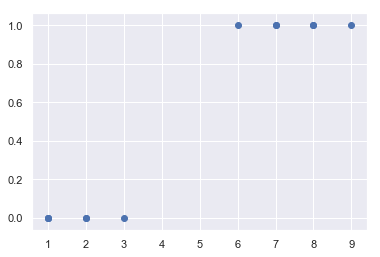

In [9]:
plt.scatter(a, y)

### Example of K Means Clustering not working

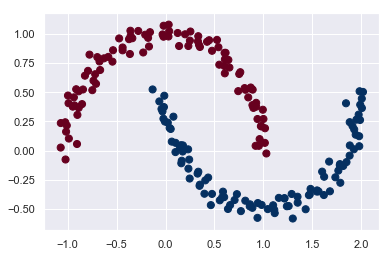

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = 'RdBu')

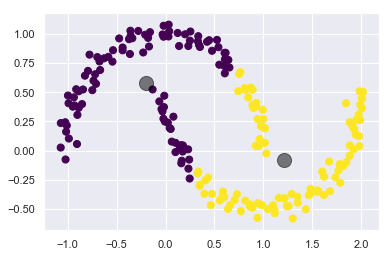

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

#this shows the failure of Kmeans clustering

C:\Users\mcc\Miniconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\mcc\Miniconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


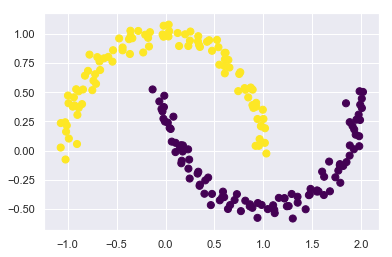

In [12]:
#above situation can be addressed as follows - 

from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
model.fit(X)
y = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

### K Means on Digits Dataset

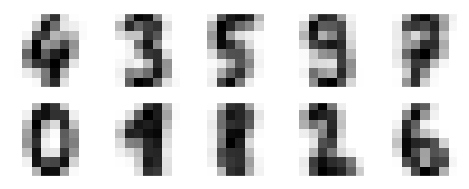

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
digits = load_digits()

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data) #assigned labels ot each cluster. 

#Note that K-Means doesn't know about original labels

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

The result is 10 clusters in 64 dimensions. Notice that the cluster centers themselves are 64-dimensional points, and **can themselves be interpreted as the "typical" digit within the cluster.** 

Be careful that though K-Means was able to mark 10 clusters and assigned each cluster a number from 0 to 9, it doesn't mean that it assigned 0 to clusters having 0 digits. 

In [14]:
digits.data[:1]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [15]:
print(digits.keys())
print(digits.data.shape)
print(digits.images.shape)
print(digits.target.shape)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
(1797, 64)
(1797, 8, 8)
(1797,)


In [16]:
print(kmeans.labels_)
print(set(kmeans.labels_))

[5 7 7 ... 7 3 3]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [17]:
print(kmeans.cluster_centers_.shape)
centers.shape

(10, 64)


(10, 8, 8)

In [18]:
kmeans.inertia_

1165177.713706214

### K-Means for Color Compression

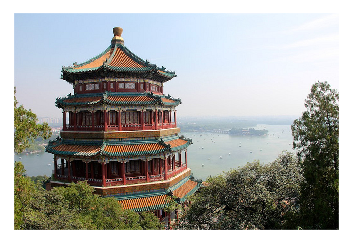

In [19]:
# Note: this requires the ``pillow`` package to be installed
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [20]:
china.shape, china[0][0] #RGB value of 'very first pixel'

((427, 640, 3), array([174, 201, 231], dtype=uint8))

In [21]:
china[0]

array([[174, 201, 231],
       [174, 201, 231],
       [174, 201, 231],
       ...,
       [250, 251, 255],
       [250, 251, 255],
       [250, 251, 255]], dtype=uint8)

In [22]:
255*255*255 #seems this is where 16 million figure is coming from. Possible number of RGB combinations per pixel.

16581375

In [23]:
#The image itself is stored in a 3-d array of size (ht, wid, RGB), containing red/blue/green contributions as 
#integers from 0 to 255:
print(china.shape),
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3) #427 ht points, 640 wid points, RGB values for each combination of ht and wid point.
print(data.shape) #wae have total 427*640 = 273280 combinations(or data points)

(427, 640, 3)
(273280, 3)


In [24]:
data[0] #normalized RGB value of first pixel 

array([0.68235294, 0.78823529, 0.90588235])

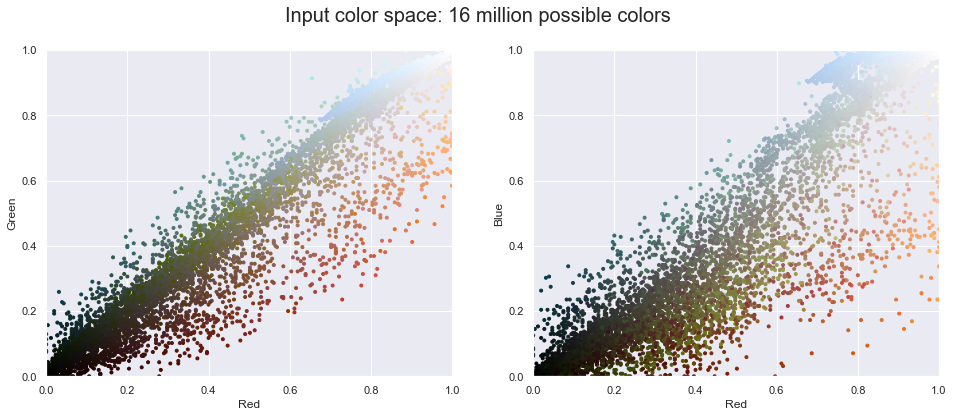

In [25]:
#We can visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency:


def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N] #selection of 10000 data points (out of permuted 273280 points)
    colors = colors[i] #masking. i is mask. 
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);
    
plot_pixels(data, title='Input color space: 16 million possible colors')    

Now let's reduce these 16 million colors to just 16 colors, using a k-means clustering across the pixel space. Because we are dealing with a very large dataset, we will use the mini batch k-means, which operates on subsets of the data to compute the result much more quickly than the standard k-means algorithm:

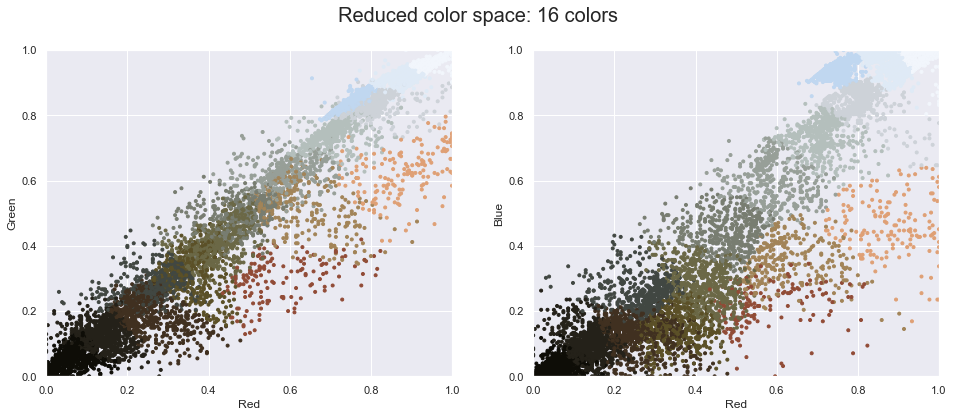

In [26]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)] 
#See what is happening above on RHS. Each data point is being replaced with its corresponding cluster center.  


plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

In [27]:
kmeans.predict(data)

array([14, 14, 14, ...,  1,  5,  5])

In [28]:
kmeans.cluster_centers_

array([[0.87281888, 0.91591345, 0.96413449],
       [0.2523509 , 0.18777819, 0.12712543],
       [0.59129856, 0.62336779, 0.59751438],
       [0.42109192, 0.40884644, 0.27634125],
       [0.80221086, 0.8242865 , 0.84561943],
       [0.05521999, 0.04996631, 0.0271575 ],
       [0.9493216 , 0.96359782, 0.98792367],
       [0.2539052 , 0.28003294, 0.25739462],
       [0.87323683, 0.62686225, 0.46049565],
       [0.7075408 , 0.74728849, 0.73889378],
       [0.35512575, 0.31262648, 0.1510236 ],
       [0.63547083, 0.51771247, 0.3467241 ],
       [0.47087646, 0.4914879 , 0.44175485],
       [0.56672997, 0.29418329, 0.21034081],
       [0.75353879, 0.84265035, 0.94301034],
       [0.1400012 , 0.12837893, 0.09849345]])

In [29]:
new_colors.shape

(273280, 3)

The result is a re-coloring of the original pixels, where each pixel is assigned the color of its closest cluster center. Plotting these new colors in the image space rather than the pixel space shows us the effect of this:


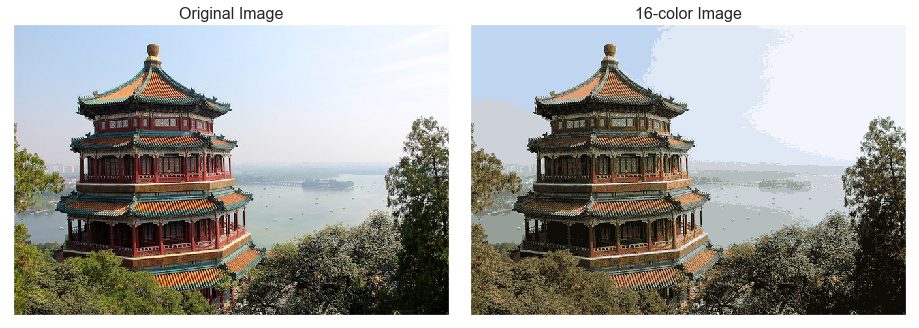

In [30]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

### K-Means - Documents clustering 

This is stripped down version of an example from official docs.

In [32]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS #collenction of common words to be ignord
from sklearn.pipeline import make_pipeline
from sklearn import metrics

categories = ['rec.sport.baseball', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
data = fetch_20newsgroups()
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [33]:
from collections import Counter
train.target_names, Counter(train.target)

(['comp.graphics',
  'rec.sport.baseball',
  'sci.space',
  'soc.religion.christian'],
 Counter({1: 597, 0: 584, 3: 599, 2: 593}))

In [34]:
len(train.data), len(test.data), X.shape

(2373, 1578, (200, 2))

In [35]:
barred = ENGLISH_STOP_WORDS.union(['thanks', 'edu', 'com']) #also ignore these words 

model = TfidfVectorizer(stop_words = barred)
X = model.fit_transform(train.data)
km = KMeans(4)
y = km.fit_predict(X)

In [36]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(train.target, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(train.target, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(train.target, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(train.target, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

Homogeneity: 0.602
Completeness: 0.643
V-measure: 0.622
Adjusted Rand-Index: 0.496
Silhouette Coefficient: 0.008


In [37]:
a =model.get_feature_names()
len(a)

35106

In [38]:
km.cluster_centers_  #these also represents typical words for each clusters

array([[0.00206752, 0.00305869, 0.00037577, ..., 0.        , 0.        ,
        0.        ],
       [0.00214659, 0.00235428, 0.        , ..., 0.        , 0.00010084,
        0.        ],
       [0.00462643, 0.00011766, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00681768, 0.00451564, 0.        , ..., 0.00024879, 0.        ,
        0.00048588]])

In [39]:
#grouping cluster id and target together
import numpy as np
i = np.argsort(train.target)# i is array containing position of train.target elements in sorted fashion
y_s = y[i] #masking
list(zip(np.sort(train.target), y_s))[:25] 

[(0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1)]

In [190]:
import pandas as pd
df = pd.DataFrame({'target': train.target, 'y' : y})
df = df.sort_values('target')
df.groupby(['target','y'])['y'].count()

target  y
0       0      5
        2    578
        3      1
1       0      2
        2    108
        3    487
2       0    387
        2    206
3       1    476
        2    123
Name: y, dtype: int64

In [40]:
a = np.array([[1,4,3],[6,9,5]])
a.argsort()

array([[0, 2, 1],
       [2, 0, 1]], dtype=int32)

In [41]:
a.argsort()[:,::-1]

array([[1, 2, 0],
       [1, 0, 2]], dtype=int32)

In [42]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1] #in each row, highest first and lowest last. See example above
terms = model.get_feature_names()
for i in range(4):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]: #ith row, first 10 highest elements
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: space nasa henry access gov alaska digex moon toronto pat
Cluster 1: graphics lines subject organization university posting host nntp ca know
Cluster 2: god jesus people christians church christ believe bible christian faith
Cluster 3: year baseball team game players games runs article writes cs


Text(80.90000000000006, 0.5, 'Cluster')

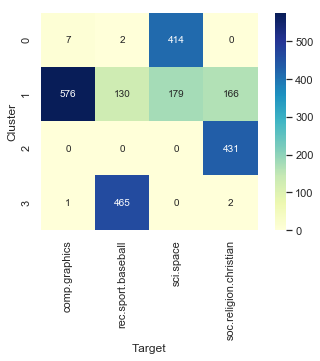

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(train.target, y)
sns.heatmap(mat.T,square=True, annot=True, fmt='d', cmap = 'YlGnBu',cbar=True, xticklabels = train.target_names)
plt.xlabel('Target')
plt.ylabel('Cluster')

### The Elbow Method - KMeans

attribute `intertia_` : - Sum of squared distances of samples to their closest cluster center.


Text(0, 0.5, 'WCSS')

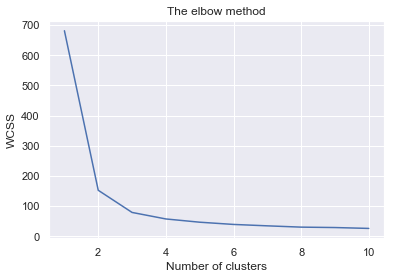

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
wcss = []

iris = load_iris()
for i in range(1,11):
    model = KMeans(n_clusters = i)
    model.fit(iris.data)
    wcss.append(model.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [45]:
wcss

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.054977867477874,
 34.40900974025974,
 30.11090607199818,
 28.759000721500723,
 25.849464483838055]

You can clearly see why it is called 'The elbow method'. From the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. Now that we have the optimum number of clusters (that is,3), we can move on to applying K-means clustering to the Iris dataset.

In [46]:
model = KMeans(n_clusters = 3)
model.fit(iris.data)
cluster = model.predict(iris.data)

In [47]:
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

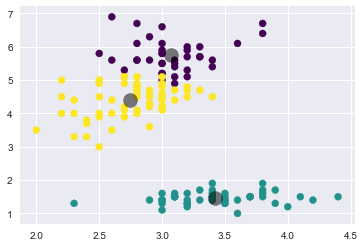

In [31]:
plt.scatter(iris.data[:,1], iris.data[:,2], c=cluster, s=50, cmap='viridis')
centers = model.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5);

In [48]:
centers

array([[[ 0.00000000e+00, -9.99200722e-16,  3.07228916e-01,
          7.16265060e+00,  1.19457831e+01,  1.93373494e+00,
          1.50602410e-01,  5.42168675e-02],
        [-2.25514052e-17,  1.20481928e-02,  3.28313253e+00,
          1.37951807e+01,  8.46385542e+00,  1.53012048e+00,
          9.75903614e-01,  2.77108434e-01],
        [-1.12757026e-17,  6.44578313e-01,  1.07108434e+01,
          1.15602410e+01,  4.33734940e+00,  5.25903614e+00,
          3.87349398e+00,  3.25301205e-01],
        [ 6.02409639e-03,  4.75903614e+00,  1.47590361e+01,
          5.86144578e+00,  6.87951807e+00,  1.07530120e+01,
          6.21686747e+00,  1.80722892e-02],
        [ 0.00000000e+00,  8.92771084e+00,  1.48072289e+01,
          9.35542169e+00,  1.28132530e+01,  1.43915663e+01,
          5.48192771e+00,  0.00000000e+00],
        [ 9.63855422e-02,  6.50602410e+00,  1.16867470e+01,
          1.23433735e+01,  1.48373494e+01,  1.07590361e+01,
          1.56626506e+00, -4.16333634e-17],
        [ 6.0240

### DBSCAN Clustering

This approach of clustering works well when number of clusters are not known *a priori* and data points follow different geometries which are not addressed by circle based approach by K-Means. 

In one of two-moons examples above, the failure of K-Means was evident. However, the same can be addressed by DBSCAN clustering algorithm. 

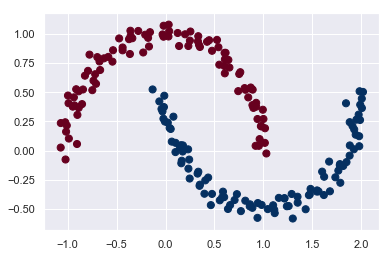

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = 'RdBu');

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = .5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)
clusters

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1], dtype=int32)

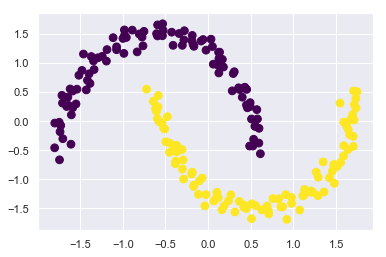

In [51]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=60);

First, remember that `-1` denotes noise points, while `0` and `1` represent clusters. In above case, we find no noise points. 
Also, setting up the parameters `eps` and `min_samples` is very important. The parameter `eps` is somewhat more important, as it determines what it means for points to be “close”. Setting `eps` to be very small will mean that no points are core samples, and may lead to all points being labeled as noise. Setting `eps` to be very large will result in all points forming a single cluster.

Increasing `eps` means that more points will be included in a cluster. This makes clusters grow, but might also lead to multiple clusters joining into one. Increasing `min_samples` means that fewer points will be core points, and more points will be labeled as noise.

The setting of `min_samples` mostly determines whether points in less dense regions will be labeled as outliers, or as their own cluster. If you decrease `min_samples`, anything that would have been a cluster with less than `min_samples` many samples will now be labeled as noise. The `min_samples` therefore determines the minimum cluster size.

### GMM

#### K- means vs GMM

There is no probability model in K-means and K-means does the ‘hard assignment’ of a data point to a cluster. It says that a particular data point either belongs to a given cluster or it doesn’t. On the other hand, GMM is a probabilistic model and it does the ‘soft assignment’. It assigns probabilities to a data point belonging to given clusters. 
